In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [2]:
TRAIN_DATA_ZIP_PATH = './vn_handwritten_images.zip'

In [3]:
import zipfile
with zipfile.ZipFile(TRAIN_DATA_ZIP_PATH,'r') as zip_ref:
    zip_ref.extractall('vietnamese_hcr/raw')

In [4]:
import pathlib
current_directory_path = pathlib.Path('./vietnamese_hcr').absolute()
current_directory_path

WindowsPath('C:/AI/Handwriten/vietnamese_hcr')

In [5]:
import os
DATA_PATH = os.path.join(str(current_directory_path),'data')
TEST_FOLDER = os.path.join(DATA_PATH,'test')
TRAIN_FOLDER = os.path.join(DATA_PATH,'train')

RAW_FOLDER = os.path.join(str(current_directory_path),'raw/vn_handwritten_images')

TRAIN_JSON = os.path.join(RAW_FOLDER,'labels.json')

In [6]:
import shutil
shutil.rmtree(DATA_PATH)
os.makedirs(DATA_PATH)
os.makedirs(TEST_FOLDER)
os.makedirs(TRAIN_FOLDER)

In [7]:
import json
with open(TRAIN_JSON,'r',encoding = 'utf8') as f:
    train_labels = json.load(f)

In [8]:
char_list = set()
for label in train_labels.values():
    char_list.update(set(label))
char_list = sorted(char_list)
print(char_list)
print(len(char_list))

[' ', '#', "'", '(', ')', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'Â', 'Ê', 'Ô', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'Đ', 'đ', 'ĩ', 'ũ', 'Ơ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ậ', 'ắ', 'ằ', 'ẵ', 'ặ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'Ứ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỵ', 'ỷ', 'ỹ']
140


In [9]:
''.join(char_list)

" #'()+,-./0123456789:ABCDEFGHIJKLMNOPQRSTUVWXYabcdeghiklmnopqrstuvwxyzÂÊÔàáâãèéêìíòóôõùúýăĐđĩũƠơưạảấầẩậắằẵặẻẽếềểễệỉịọỏốồổỗộớờởỡợụủỨứừửữựỳỵỷỹ"

In [10]:
def encode_to_labels(txt):
    dig_lst = []
    for index,char in enumerate(txt):
        try:
            dig_lst.append(char_list.index(char))
        except:
            print('No found in char_list : ',char)
    return dig_lst

In [11]:
encode_to_labels('Welcome to my life')

No found in char_list :  f


[43, 50, 55, 48, 58, 56, 50, 0, 63, 58, 0, 56, 68, 0, 55, 53, 50]

In [12]:
#find all image paths for train folder 1 and 2 and test folder
train_image_path =[]
for item in pathlib.Path(RAW_FOLDER).glob('**/*'):
    if item.is_file() and item.suffix not in ['.json']:
        train_image_path.append(str(item))

In [13]:
train_image_path[:10]

['C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0000_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0001_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0002_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0003_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0004_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0005_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0006_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0007_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0008_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0009_samples.png']

In [14]:
dict_filepath_label={}
raw_data_path = pathlib.Path(os.path.join(RAW_FOLDER))
for item in raw_data_path.glob('**/*.*'):
    file_name=str(os.path.basename(item))
    if file_name != "labels.json":
      label = train_labels[file_name]
      dict_filepath_label[str(item)]=label

In [15]:
dict_filepath_label

{'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0000_samples.png': 'Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0001_samples.png': 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0002_samples.png': 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0003_samples.png': '42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0004_samples.png': '200 Phan Bội Châu, Phường Trường An, Thành phố Huế, Thừa Thiên - Huế',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0005_samples.png': '27A Hoàng Việt, Phường 4, Quận Tân Bình, TP Hồ Chí Minh',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwr

In [16]:
#find the maximum label length
label_lens= []
for label in dict_filepath_label.values():
    label_lens.append(len(label))
max_label_len = max(label_lens)

max_label_len

69

In [17]:
all_image_paths = list(dict_filepath_label.keys())

In [18]:
all_image_paths[:3]

['C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0000_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0001_samples.png',
 'C:\\AI\\Handwriten\\vietnamese_hcr\\raw\\vn_handwritten_images\\data\\0002_samples.png']

In [19]:
import cv2
widths = []
heights = []
for image_path in all_image_paths:
    img = cv2.imread(image_path)
    (height, width, _) = img.shape
    heights.append(height)
    widths.append(width)

In [20]:
min_height = min(heights)
max_height = max(heights)
min_width = min(widths)
max_width = max(widths)

In [21]:
(min_height,max_height,min_width,max_width)

(94, 376, 955, 2694)

In [22]:
from sklearn.model_selection import train_test_split
test_size = 0.2
train_image_paths, val_image_paths = train_test_split(all_image_paths, test_size=test_size, random_state=42)

In [23]:
TIME_STEPS = 240

In [24]:
import numpy as np

# lists for training dataset
training_img = []
training_txt = []
train_input_length = []
train_label_length = []
orig_txt = []
resize_max_width=0
i=0
for train_img_path in train_image_paths:
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(train_img_path), cv2.COLOR_BGR2GRAY)
    
    height, width = img.shape

    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(118/height*width),118))
    
    height, width = img.shape
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]

    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    # YOUR PART: Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # YOUR PART: Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[train_img_path]

    # split data into validation and training dataset as 10% and 90% respectively
    orig_txt.append(label)   
    train_label_length.append(len(label))

    # our time steps for valid input
    train_input_length.append(TIME_STEPS)
    training_img.append(img)

    # convert words to digits based on charlist
    training_txt.append(encode_to_labels(label)) 
    i+=1
    if (i%500 == 0):
        print ("has processed trained {} files".format(i))
print(resize_max_width)

has processed trained 500 files
has processed trained 1000 files
2167


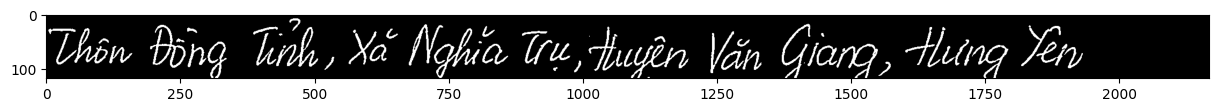

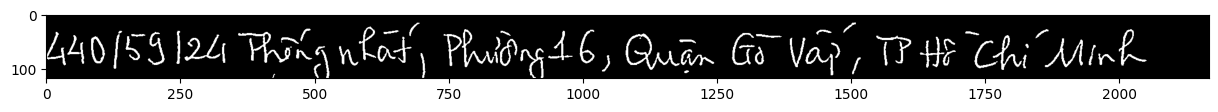

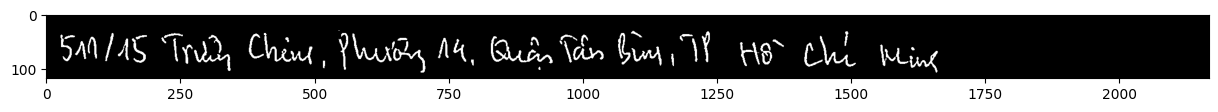

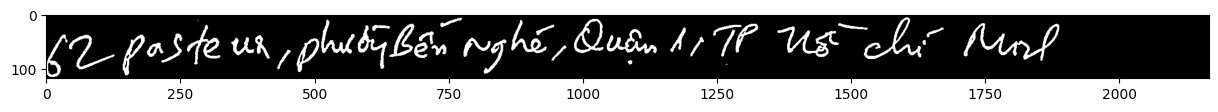

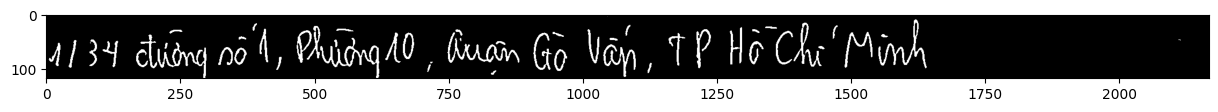

In [25]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(training_img[i][:,:,0], cmap="gray")
    plt.show()

In [26]:
#lists for validation dataset
valid_img = []
valid_txt = []
valid_input_length = []
valid_label_length = []
valid_orig_txt = []

i=0

for val_img_path in val_image_paths:
    # print(f_name)
    # read input image and convert into gray scale image
    img = cv2.cvtColor(cv2.imread(val_img_path), cv2.COLOR_BGR2GRAY)
    
    # in this dataset, we don't need to do any resize at all here.
    img = cv2.resize(img,(int(118/height*width),118))
    
    if img.shape[1] > resize_max_width:
        resize_max_width = img.shape[1]
        
    img = np.pad(img, ((0,0),(0, 2167-width)), 'median')
    
    # YOUR PART: Blur it
    img = cv2.GaussianBlur(img, (5,5), 0)

    # YOUR PART: Threshold the image using adapative threshold
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    
    # add channel dimension
    img = np.expand_dims(img , axis = 2)
    
    # Normalize each image
    img = img/255.

    label = dict_filepath_label[val_img_path]

    valid_orig_txt.append(label)   
    valid_label_length.append(len(label))

    # our time steps for valid input
    valid_input_length.append(TIME_STEPS)
    valid_img.append(img)

    # convert words to digits based on charlist
    valid_txt.append(encode_to_labels(label))
    i+=1
    if (i%500 == 0):
        print ("has processed test {} files".format(i))
print(resize_max_width)

2167


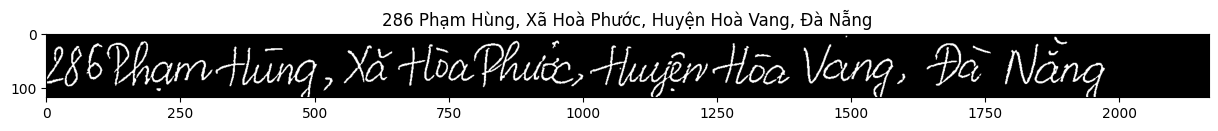

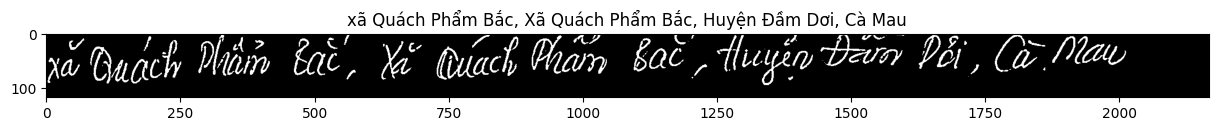

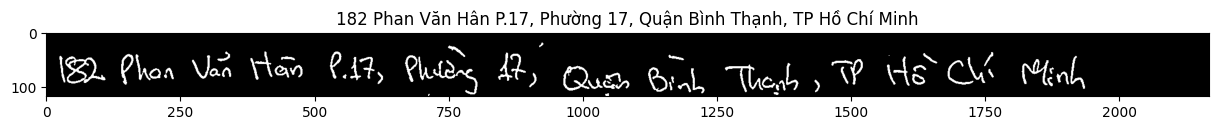

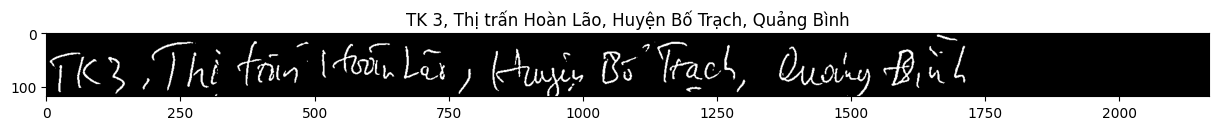

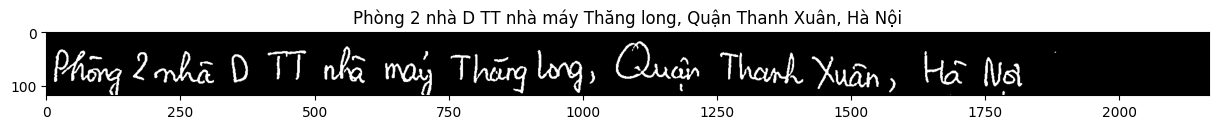

In [27]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.figure(figsize=(15,2))
    plt.imshow(valid_img[i][:,:,0], cmap="gray")
    plt.title(valid_orig_txt[i])
    plt.show()

In [28]:
# this is the most controlversial path when out max_label_len should be set different of slightly smaller than TIME_STEP
# but let stick to the conventional/normal way: we should to be the same with our TIME_STEP
max_label_len = TIME_STEPS 

In [29]:
# import padding library
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad each output label to maximum text length, remember we did that so that we keep training with rnn consistent?
train_padded_txt = pad_sequences(training_txt, maxlen=max_label_len, padding='post', value = 0)
valid_padded_txt = pad_sequences(valid_txt, maxlen=max_label_len, padding='post', value = 0)

In [30]:
print(training_txt[0])
train_padded_txt[0]

[40, 52, 84, 57, 0, 90, 119, 57, 51, 0, 40, 114, 57, 52, 6, 0, 44, 76, 0, 34, 51, 52, 92, 46, 0, 40, 61, 128, 6, 0, 28, 64, 68, 113, 57, 0, 42, 89, 57, 0, 27, 53, 46, 57, 51, 6, 0, 28, 96, 57, 51, 0, 45, 79, 57]


array([ 40,  52,  84,  57,   0,  90, 119,  57,  51,   0,  40, 114,  57,
        52,   6,   0,  44,  76,   0,  34,  51,  52,  92,  46,   0,  40,
        61, 128,   6,   0,  28,  64,  68, 113,  57,   0,  42,  89,  57,
         0,  27,  53,  46,  57,  51,   6,   0,  28,  96,  57,  51,   0,
        45,  79,  57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Model building

In [31]:
# import our model, different layers and activation function 
from tensorflow.keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.activations import relu, sigmoid, softmax
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import CSVLogger, TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [32]:
# OUR FULL MODEL OF CRNN AND LSTM

# input with shape of height=32 and width=128 
inputs = Input(shape=(118,2167,1))
 
# Block 1
x = Conv2D(64, (3,3), padding='same')(inputs)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_1 = x 

# Block 2
x = Conv2D(128, (3,3), padding='same')(x)
x = MaxPool2D(pool_size=3, strides=3)(x)
x = Activation('relu')(x)
x_2 = x

# Block 3
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_3 = x

# Block4
x = Conv2D(256, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_3])
x = Activation('relu')(x)
x_4 = x

# Block5
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x_5 = x

# Block6
x = Conv2D(512, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x,x_5])
x = Activation('relu')(x)

# Block7
x = Conv2D(1024, (3,3), padding='same')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=(3, 1))(x)
x = Activation('relu')(x)

# pooling layer with kernel size (2,2) to make the height/2 #(1,9,512)
x = MaxPool2D(pool_size=(3, 1))(x)
 
# # to remove the first dimension of one: (1, 31, 512) to (31, 512) 
squeezed = Lambda(lambda x: K.squeeze(x, 1))(x)
 
# # # bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(512, return_sequences=True, dropout = 0.2))(blstm_1)

# # this is our softmax character proprobility with timesteps 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time

act_model = Model(inputs, outputs)

In [33]:
act_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 118, 2167, 1 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 118, 2167, 64 640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 39, 722, 64)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 39, 722, 64)  0           max_pooling2d[0][0]              
______________________________________________________________________________________________

In [34]:
### ctc definition part 


# define the label input shape for ctc
labels = Input(name='the_labels', shape=[max_label_len], dtype='float32')


# define the length of input and label for ctc
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
# define a ctc lambda function to take arguments and return ctc_bach_cost
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args

    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
# out loss function (just take the inputs and put it in our ctc_batch_cost)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [35]:
# ready ctc loss function and optimizers
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer = 'adam')

# our callbacks hell to optimize our learning
callbacks = [
    TensorBoard(
        log_dir='./logs',
        histogram_freq=10,
        profile_batch=0,
        write_graph=True,
        write_images=False,
        update_freq="epoch"),
    ModelCheckpoint(
        filepath=os.path.join('checkpoint_weights.hdf5'),
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True,
        verbose=1),
    EarlyStopping(
        monitor='val_loss',
        min_delta=1e-8,
        patience=20,
        restore_best_weights=True,
        verbose=1),
    ReduceLROnPlateau(
        monitor='val_loss',
        min_delta=1e-8,
        factor=0.2,
        patience=10,
        verbose=1)
]
callbacks_list = callbacks

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 118, 2167, 1 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 118, 2167, 64 640         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 39, 722, 64)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 39, 722, 64)  0           max_pooling2d[0][0]              
____________________________________________________________________________________________

In [37]:
# notice I convert everything to numpy array here since model can fit either tensors and numpy array
# the reason why i stick with numpy array because it is simple to code and also because it is baseline solution
# I want to use openCV (can't run with tensors because it is CPU operations)
# And if I want to use tensors then i will make sure my image preprocessing functions uses tensor compatible operations

# ready our training data
training_img = np.array(training_img)
train_input_length = np.array(train_input_length)  # all must be equal length to T timesteps
train_label_length = np.array(train_label_length)  # different length (only the same in Captcha dataset)

# ready our validating data
valid_img = np.array(valid_img)
valid_input_length = np.array(valid_input_length) # all must be equal length to T timesteps
valid_label_length = np.array(valid_label_length) # different length (only the same in Captcha dataset)

In [56]:
# choose batchsize and epochs

batch_size = 12
epochs = 5

history = model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length], 
          y=np.zeros(len(training_img)),
          batch_size=batch_size, 
          epochs = epochs,
          validation_data = ([valid_img, valid_padded_txt, valid_input_length, valid_label_length], [np.zeros(len(valid_img))]),
          verbose = 1, callbacks = callbacks_list)

Epoch 1/5
123/123 [==============================] - 180s 1s/step - loss: 3.2330 - val_loss: 15.7614

Epoch 00001: val_loss did not improve from 15.39139
Epoch 2/5
123/123 [==============================] - 183s 1s/step - loss: 2.7943 - val_loss: 16.8772

Epoch 00002: val_loss did not improve from 15.39139
Epoch 3/5
123/123 [==============================] - 183s 1s/step - loss: 2.2562 - val_loss: 16.3137

Epoch 00003: val_loss did not improve from 15.39139
Epoch 4/5
123/123 [==============================] - 183s 1s/step - loss: 1.5477 - val_loss: 16.4060

Epoch 00004: val_loss did not improve from 15.39139
Epoch 5/5
123/123 [==============================] - 183s 1s/step - loss: 1.2458 - val_loss: 15.9033

Epoch 00005: val_loss did not improve from 15.39139


###  Evaluation

In [38]:
act_model.load_weights(os.path.join(r'D:\checkpoint_weights.hdf5'))

In [50]:
NO_PREDICTS = 100
OFFSET = 0
# Prediction = act_model.predict(valid_img[OFFSET:OFFSET+NO_PREDICTS])
prediction = act_model.predict(valid_img,batch_size=12)

# Test

In [39]:
prediction.shape

(368, 240, 141)

In [40]:
prediction[0].shape

(240, 141)

In [41]:
print(valid_img.shape)
print(img.shape)

(368, 118, 2167, 1)
(118, 2167, 1)


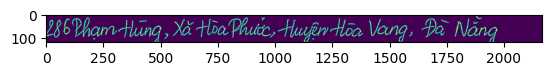

In [42]:
plt.imshow(valid_img[0])

In [45]:
valid_orig_txt[0]

'286 Phạm Hùng, Xã Hoà Phước, Huyện Hoà Vang, Đà Nẵng'

In [81]:
out

array([[12, 18, 16, ..., -1, -1, -1],
       [67,  0, 24, ..., -1, -1, -1],
       [11, 12, 11, ..., -1, -1, -1],
       ...,
       [32,  0, 14, ..., -1, -1, -1],
       [14, 18, 17, ..., -1, -1, -1],
       [15, 11, 18, ..., -1, -1, -1]], dtype=int64)

original_text  =  286 Phạm Hùng, Xã Hoà Phước, Huyện Hoà Vang, Đà Nẵng
predicted text =  T7 Thị Hân ua Bình


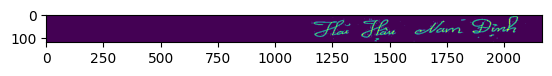

In [124]:
img =cv2.imread(r'C:\Users\Administrator\Downloads\long.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# in this dataset, we don't need to do any resize at all here.
img = cv2.resize(img,(int(118/height*width),118))

# if img.shape[1] > resize_max_width:
#     resize_max_width = img.shape[1]

img = np.pad(img, ((0,0),(0, 2167-width)), 'median')

# # YOUR PART: Blur it
# img = cv2.GaussianBlur(img, (5,5), 0)

# YOUR PART: Threshold the image using adapative threshold
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# add channel dimension
img = np.expand_dims(img , axis = 2)

# Normalize each image
img = img/255.
plt.imshow(img)
img = img.reshape(1,118, 2167, 1)
prediction=act_model.predict(img)

#use CTC decode
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1], greedy = True)[0][0])
# see results
all_predictions = []
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

In [52]:
# use CTC decoder
out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
# see the results
all_predictions =[]
i = 0
for x in out:
    print("original_text  = ", valid_orig_txt[i+OFFSET])
    print("predicted text = ", end = '')
    pred = ""
    for p in x:  
        if int(p) != -1:
            pred += char_list[int(p)]
    print(pred)
    all_predictions.append(pred)
    i+=1

original_text  =  286 Phạm Hùng, Xã Hoà Phước, Huyện Hoà Vang, Đà Nẵng
predicted text = 286 Phạm Hùng, Xã Hòa Phước, Huyện Hoà Vang, Đà Nông
original_text  =  xã Quách Phẩm Bắc, Xã Quách Phẩm Bắc, Huyện Đầm Dơi, Cà Mau
predicted text = xã Quách Phẩm Bắc, Xã Quách Phẩm Bắc, Huyện Đầm Dơi, Cà Mau
original_text  =  182 Phan Văn Hân P.17, Phường 17, Quận Bình Thạnh, TP Hồ Chí Minh
predicted text = 182 Phan Văn Hân P.17, Phường 17, Quận Bình Thạnh, TP Hồ Chí Minh
original_text  =  TK 3, Thị trấn Hoàn Lão, Huyện Bố Trạch, Quảng Bình
predicted text = TK3, Thị trấn Hoần Lãi, Huyện Bĩ Trạc, Quảng Bình
original_text  =  Phòng 2 nhà D TT nhà máy Thăng long, Quận Thanh Xuân, Hà Nội
predicted text = Phòng 2 nhà D TT nhà máy Thăng long, Quận Thanh Xuân, Hà Nội
original_text  =  Lô C1, KCN Quang Châu, Xã Quang Châu, Huyện Việt Yên, Bắc Giang
predicted text = Lô C1, KCN Quang Châu, Xã Quang Châu, Huyện Việt Yên, Bắc Giang
original_text  =  Tầng 8, 57-59 Hồ Tùng Mậu, Phường Bến Nghé, Quận 1, TP Hồ Chí 

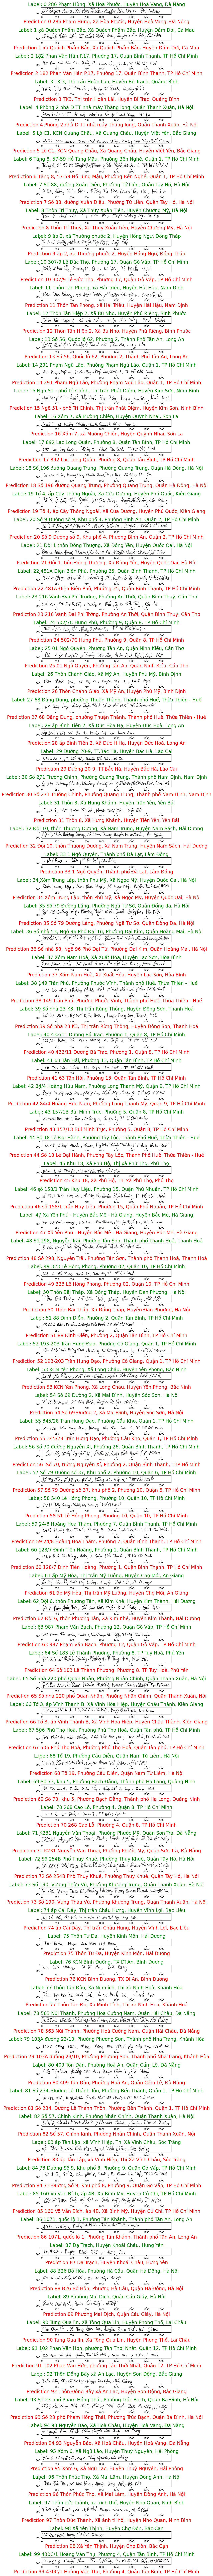

In [53]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.figure(figsize = (10,200))
col = 0
row = 1
gs1 = gridspec.GridSpec(NO_PREDICTS,1)
#gs1.update(wspace = 0.025, hspace = 0.025)
for n in range(NO_PREDICTS):
    plt.subplot(gs1[n])
    plt.imshow(valid_img[n][:,:,0],cmap = 'gray_r')
    plt.title(f'Label: {n} '+valid_orig_txt[n+OFFSET], fontsize = 20,color = 'green')
    plt.xlabel(f"Prediction {n} "+ all_predictions[n+OFFSET],fontsize = 20, color = 'red')

In [163]:
import string
import unicodedata
import editdistance


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))

        pd_cer, gt_cer = list(pd.lower()), list(gt.lower())
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd.lower().split(), gt.lower().split()
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))

        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))

    cer_f = sum(cer) / len(cer)
    wer_f = sum(wer) / len(wer)
    ser_f = sum(ser) / len(ser)

    return (cer_f, wer_f, ser_f)

In [164]:
evaluate = ocr_metrics(predicts=all_predictions, ground_truth=valid_orig_txt, norm_accentuation= False, norm_punctuation=False)

e_corpus = '\n'.join([
    'Metrics:',
    'Character Error Rate: {}'.format(evaluate[0]),
    'Word Error Rate: {}'.format(evaluate[1]),
    'Sequence Error Rate: {}'.format(evaluate[2])
])

In [166]:
print(e_corpus)

Metrics:
Character Error Rate: 0.014852137899842332
Word Error Rate: 0.04213648670170409
Sequence Error Rate: 0.24456521739130435
